In [1]:
include("speciale_tools.jl")

inpolygon

In [2]:
import JLD
using Statistics
min_vv = -19
max_vv = 4

min_vh = -26
max_vh = -3

min_r = -10
max_r = 1;

min_h = -10
max_h = 100;

In [3]:
folder = "/home/data/simon/processed/66_fyn_winter2020/vejle" # desend

dem_nan = 40

co_gamma = JLD.load(joinpath(folder,"21VV_coher.jld"),"data")
pre_gamma = JLD.load(joinpath(folder,"23VV_coher.jld"),"data")

VV_paths = [joinpath(folder,string(i)*"VV_itens.jld") for i=1:3]
VV = [JLD.load(path,"data") for path in VV_paths]
VH_paths = [joinpath(folder,string(i)*"VH_itens.jld") for i=1:3]
VH = [JLD.load(path,"data") for path in VH_paths];
heights = JLD.load(joinpath(folder,"heights.jld"),"data").-dem_nan;

line_sample = JLD.load(joinpath(folder,"line_sample.jld"))
samples = collect(line_sample["samples"]) #[1:7:end]
lines = collect(line_sample["lines"]) #[1:2:end]
lut = JLD.load(joinpath(folder,"21_lut.jld"),"data");

In [4]:
 folder = "/home/data/simon/result/segmenting/0Vejle"

"/home/data/simon/result/segmenting/0Vejle"

In [161]:
function region_growing(seed_mask,region_grow_mask ; max_inter=1000, tol=0)
    res = seed_mask
    steps = 1
    diff = tol +5
    while diff> tol
        
        new_mask = _region_grow_step(res, region_grow_mask)
        diff = sum(new_mask .!= res)
        res= new_mask
        
        if steps >= max_inter
            println("Max Iter reached:  region_growing()")
            break
        end
        steps += 1
    end
    return res,steps
end


function _region_grow_step(seed_mask, region_grow_mask)
    res = skimage_morph.binary_dilation(seed_mask)
    return res.& region_grow_mask 
end


import FileIO

function rg_gif(file_path, seed_mask, region_grow_mask,img,n)
    res = copy(seed_mask);
    gif_file = Array{RGB{Float32}}(undef, size(res)..., n+1);
    gif_file[:,:,1] .= add_mask(img, res ,(0,0,1))

    for i = 1:n
        res = _region_grow_step(res, region_grow_mask)
        gif_file[:,:,i+1] .= add_mask(img, res ,(0,0,1));
        end;

    FileIO.save(file_path, gif_file)
end

rg_gif (generic function with 1 method)

In [102]:
img = pretty_img(VV,min_vv,max_vv);

In [110]:
using Plots

In [ ]:
mask = 
for i = 1:10
    mask = ()

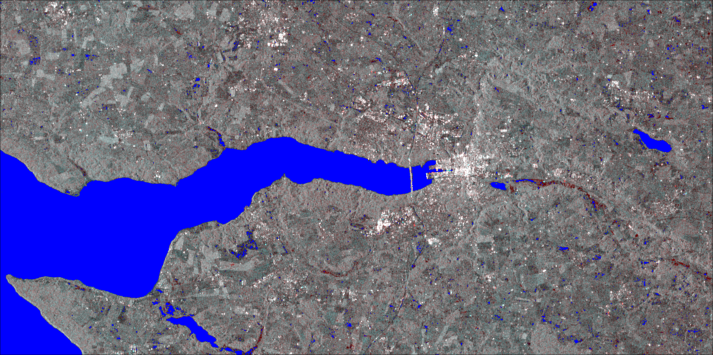

In [103]:
permant_water_VH = sum([10 .*log10.(band) .< -25 for band in VH]);
permant_water_VV = sum([10 .*log10.(band) .< -17 for band in VV]);
rg_mask = ((1.5 .<permant_water_VV) .| (1.5 .<permant_water_VH))
add_mask(img, rg_mask ,(0,0,1))

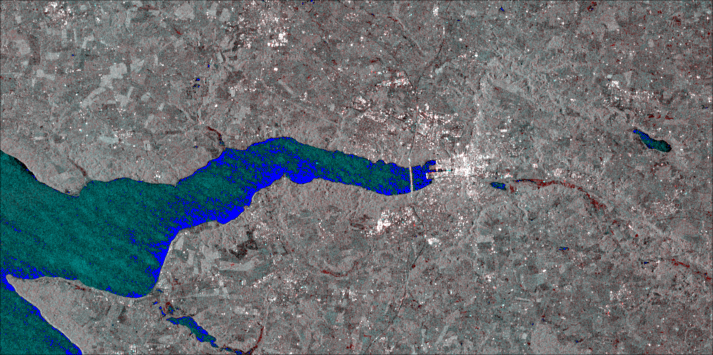

In [104]:
permant_water_VH = sum([10 .*log10.(band) .< -25 for band in VH]);
permant_water_VV = sum([10 .*log10.(band) .< -17 for band in VV]);
seed_mask = ((2.5 .<permant_water_VV) .& (2.5 .<permant_water_VH));
add_mask(img, seed_mask ,(0,0,1))

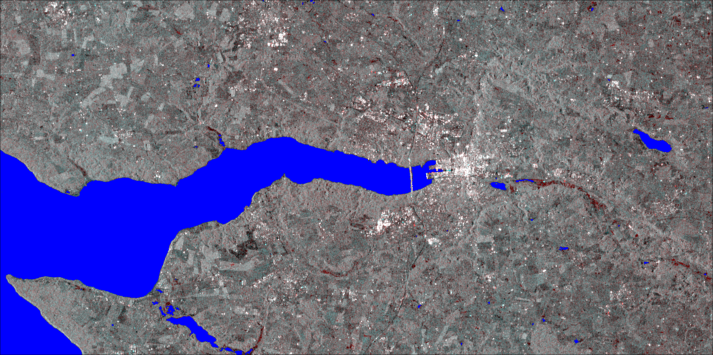

In [107]:
rg_result, steps = region_growing(seed_mask,rg_mask);
add_mask(img, rg_result ,(0,0,1))

In [163]:
file_path = joinpath(folder,"test_large.gif")
rg_gif(file_path, seed_mask,rg_mask,img,50);